In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


**Tiền xử lý**

In [ ]:
import os
from PIL import Image

def resize_images(base_dir, categories=('U', 'V', 'W', 'X', 'Y'), size=(200, 200)):
    """
    Resize tất cả ảnh trong thư mục img/train và img/test về 200x200,
    đảm bảo ảnh có 3 kênh màu RGB.
    """
    for dataset in ['train', 'test']:
        for category in categories:
            folder_path = os.path.join(base_dir, dataset, category)
            if not os.path.exists(folder_path):
                continue

            for file_name in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file_name)
                try:
                    with Image.open(file_path) as img:
                        img = img.convert("RGB")  # Đảm bảo ảnh có 3 kênh màu
                        if img.size != size:
                            img = img.resize(size, Image.LANCZOS)
                            img.save(file_path)  # Ghi đè ảnh cũ
                            print(f"Resized: {file_path}")
                except Exception as e:
                    print(f"Error processing {file_path}: {e}")

# Gọi hàm resize trên thư mục img
resize_images("/content/drive/MyDrive/Colab Notebooks/DeepLearning/Project/img")
print("Done!")

Streaming output truncated to the last 5000 lines.
Resized: /content/drive/MyDrive/Colab Notebooks/DeepLearning/Project/img/train/U/0d7edcab-bf08-4b37-9b72-bceeb59f64a6.rgb_0000.png
Resized: /content/drive/MyDrive/Colab Notebooks/DeepLearning/Project/img/train/U/19c31102-b273-476e-bb37-1f2a90453c05.rgb_0000.png
Resized: /content/drive/MyDrive/Colab Notebooks/DeepLearning/Project/img/train/U/0ef322fb-1d81-4eb2-98b4-bc3c4f52de87.rgb_0000.png
Resized: /content/drive/MyDrive/Colab Notebooks/DeepLearning/Project/img/train/U/1911878b-fb92-408d-8d4b-36afbe5938a2.rgb_0000.png
Resized: /content/drive/MyDrive/Colab Notebooks/DeepLearning/Project/img/train/U/02faf266-54dd-4213-84e6-0c431c94fdeb.rgb_0000.png
Resized: /content/drive/MyDrive/Colab Notebooks/DeepLearning/Project/img/train/U/0ac7f589-326a-4e21-adb8-144ffb523d7c.rgb_0000.png
Resized: /content/drive/MyDrive/Colab Notebooks/DeepLearning/Project/img/train/U/0ab94782-6038-499f-a335-5cc353e7b25b.rgb_0000.png
Resized: /content/drive/MyDrive/

**Làm giàu dữ liệu**

In [ ]:
import os
import torchvision.transforms as transforms
from PIL import Image

# Định nghĩa Augmentations
augmentations = transforms.Compose([
    transforms.Resize((200, 200)),
    transforms.RandomRotation(15),  # Xoay ngẫu nhiên ±15 độ
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.02),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Thư mục chứa ảnh
base_dir = "/content/drive/MyDrive/Colab Notebooks/DeepLearning/Project/img"
categories = ['U', 'V', 'W', 'X', 'Y']

# Lặp qua từng thư mục dataset (train, test)
for dataset in ['train', 'test']:
    for category in categories:
        folder_path = os.path.join(base_dir, dataset, category)

        # Kiểm tra nếu thư mục tồn tại
        if not os.path.exists(folder_path):
            print(f"Thư mục không tồn tại: {folder_path}")
            continue

        # Duyệt qua từng ảnh trong thư mục
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)

            try:
                # Mở ảnh gốc
                image = Image.open(img_path).convert("RGB")

                # Tạo 3 phiên bản augment
                for i in range(3):
                    augmented_image = augmentations(image)
                    augmented_image = transforms.ToPILImage()(augmented_image)  # Chuyển tensor về ảnh

                    # Lưu ảnh mới với tên mới
                    save_path = os.path.join(folder_path, f"{os.path.splitext(img_name)[0]}_aug_{i}.jpg")
                    augmented_image.save(save_path)

            except Exception as e:
                print(f"Lỗi khi xử lý ảnh {img_name}: {e}")

print("Đã tạo các bản sao với Augmentation!")


Đã tạo các bản sao với Augmentation!


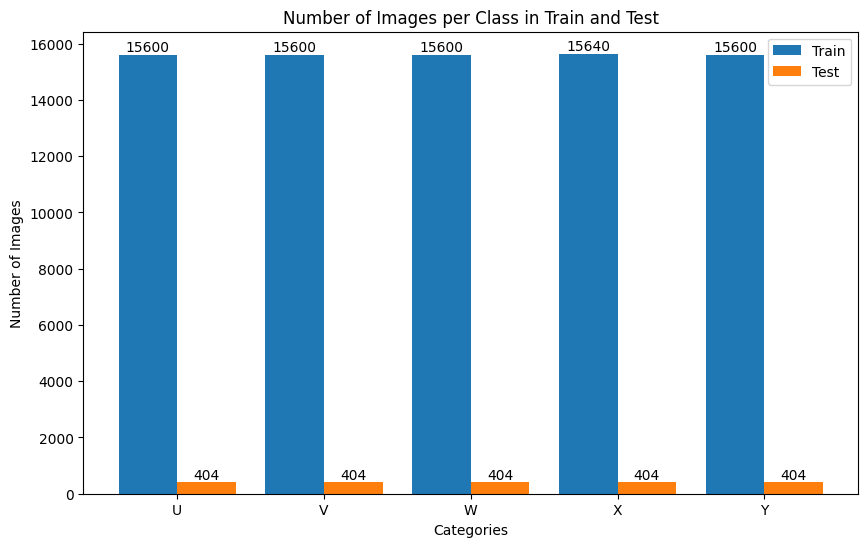

In [ ]:
import matplotlib.pyplot as plt
import os

def count_images(base_dir, categories=('U', 'V', 'W', 'X', 'Y')):
    """
    Đếm số ảnh trong từng lớp của train và test, vẽ biểu đồ cột.
    """
    counts = {"train": {}, "test": {}}

    for dataset in ['train', 'test']:
        for category in categories:
            folder_path = os.path.join(base_dir, dataset, category)
            if os.path.exists(folder_path):
                counts[dataset][category] = len(os.listdir(folder_path))
            else:
                counts[dataset][category] = 0

    # Vẽ biểu đồ
    fig, ax = plt.subplots(figsize=(10, 6))
    bar_width = 0.4
    index = range(len(categories))

    train_counts = [counts['train'][cat] for cat in categories]
    test_counts = [counts['test'][cat] for cat in categories]

    train_bars = ax.bar(index, train_counts, bar_width, label='Train')
    test_bars = ax.bar([i + bar_width for i in index], test_counts, bar_width, label='Test')

    ax.set_xlabel("Categories")
    ax.set_ylabel("Number of Images")
    ax.set_title("Number of Images per Class in Train and Test")
    ax.set_xticks([i + bar_width / 2 for i in index])
    ax.set_xticklabels(categories)
    ax.legend()

    # Hiển thị số lượng trên mỗi cột
    for bar in train_bars + test_bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

    plt.show()

count_images("/content/drive/MyDrive/Colab Notebooks/DeepLearning/Project/img")

**Huấn luyện**

In [ ]:
!pip install torchsummary

## **Classification with VGG19 Fine-Tune**


In [ ]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, random_split
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
from torchsummary import summary
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
import torch_xla
import torch_xla.core.xla_model as xm
import gc


**Tạo DataLoader**

In [ ]:
# Transform cho ảnh đầu vào, thêm góc quay, độ nghiêng, thay đổi độ sáng, v.v.,
transform = transforms.Compose([
    transforms.Resize((200, 200)),
    #transforms.RandomRotation(15),  # Xoay ngẫu nhiên ±15 độ
    #transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.02),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])


# Load dataset từ thư mục
train_folder = "/content/drive/MyDrive/Colab Notebooks/DeepLearning/Project/img/train"
test_folder = "/content/drive/MyDrive/Colab Notebooks/DeepLearning/Project/img/test"

# Tạo DataLoader
dataset_train = datasets.ImageFolder(root=train_folder, transform=transform)
dataset_test = datasets.ImageFolder(root=test_folder, transform=transform)

# Chia tập train thành 70% train, 30% validation
train_size = int(0.7 * len(dataset_train))
valid_size = len(dataset_train) - train_size
train_dataset, valid_dataset = random_split(dataset_train, [train_size, valid_size])

# Dataloader tối ưu cho TPU
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4, pin_memory=True, prefetch_factor=2)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False, num_workers=4, pin_memory=True, prefetch_factor=2)
test_loader = DataLoader(dataset_test, batch_size=32, shuffle=False, num_workers=4, pin_memory=True, prefetch_factor=2)

# Kiểm tra số lượng ảnh trong từng tập
print(f"Train size: {len(train_dataset)}, Validation size: {len(valid_dataset)}, Test size: {len(dataset_test)}")

Train size: 54628, Validation size: 23412, Test size: 2020


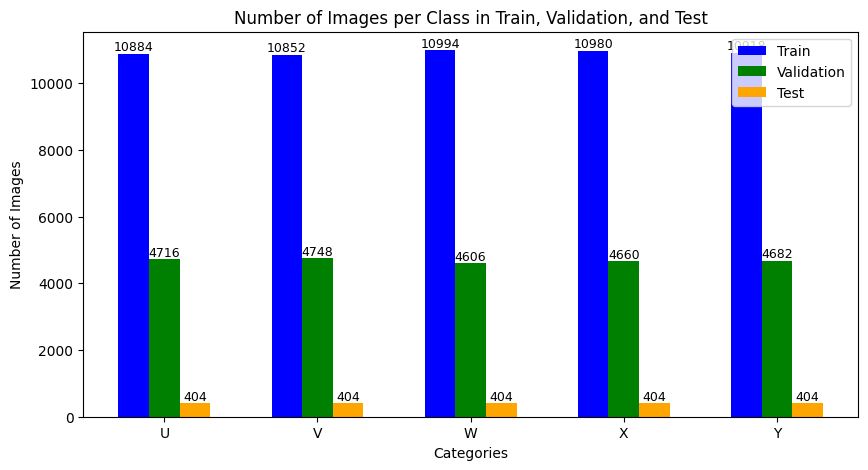

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Đếm số lượng ảnh trong từng class cho tập train, valid, test
train_class_counts = Counter([dataset_train.targets[i] for i in train_dataset.indices])
valid_class_counts = Counter([dataset_train.targets[i] for i in valid_dataset.indices])
test_class_counts = Counter(dataset_test.targets)

# Danh sách các class theo thứ tự
class_names = dataset_train.classes
num_classes = len(class_names)

# Chuyển đổi thành danh sách có thứ tự
train_counts = [train_class_counts[i] if i in train_class_counts else 0 for i in range(num_classes)]
valid_counts = [valid_class_counts[i] if i in valid_class_counts else 0 for i in range(num_classes)]
test_counts = [test_class_counts[i] if i in test_class_counts else 0 for i in range(num_classes)]

# Vẽ biểu đồ cột nhóm
x = np.arange(num_classes)  # Vị trí các cột trên trục x
width = 0.2  # Độ rộng của mỗi cột

fig, ax = plt.subplots(figsize=(10, 5))

bars1 = ax.bar(x - width, train_counts, width, label='Train', color='blue')
bars2 = ax.bar(x, valid_counts, width, label='Validation', color='green')
bars3 = ax.bar(x + width, test_counts, width, label='Test', color='orange')

# Gắn số lượng ảnh lên cột
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', ha='center', va='bottom', fontsize=9)

# Thiết lập trục
ax.set_xlabel("Categories")
ax.set_ylabel("Number of Images")
ax.set_title("Number of Images per Class in Train, Validation, and Test")
ax.set_xticks(x)
ax.set_xticklabels(class_names)
ax.legend()

plt.show()


**VGG-19 với BatchNorm, Dropout và Fine-Tune**

In [ ]:
class CustomVGG19(nn.Module):
    def __init__(self, num_classes=5):
        super(CustomVGG19, self).__init__()
        self.features = models.vgg19(pretrained=True).features

        # Thêm Batch Norm và Dropout
        self.classifier = nn.Sequential(
            nn.Linear(512 * 6 * 6, 4096),
            nn.ReLU(),
            nn.BatchNorm1d(4096),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(), nn.BatchNorm1d(4096),
            nn.Dropout(0.5),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x



**Đánh giá mô hình**

In [ ]:
# Dùng TPU thay vì GPU
device = xm.xla_device()

# Khởi tạo mô hình
model = CustomVGG19(num_classes=5).to(device)

# Fine-tune toàn bộ mô hình
for param in model.parameters():
    param.requires_grad = True

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:04<00:00, 126MB/s]


In [ ]:
# Chuyển mô hình sang CPU để tránh lỗi
model.to("cpu")

# Hiển thị kiến trúc mô hình
summary(model, (3, 200, 200))

# Trả device về TPU
model.to(xm.xla_device())

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 200, 200]           1,792
              ReLU-2         [-1, 64, 200, 200]               0
            Conv2d-3         [-1, 64, 200, 200]          36,928
              ReLU-4         [-1, 64, 200, 200]               0
         MaxPool2d-5         [-1, 64, 100, 100]               0
            Conv2d-6        [-1, 128, 100, 100]          73,856
              ReLU-7        [-1, 128, 100, 100]               0
            Conv2d-8        [-1, 128, 100, 100]         147,584
              ReLU-9        [-1, 128, 100, 100]               0
        MaxPool2d-10          [-1, 128, 50, 50]               0
           Conv2d-11          [-1, 256, 50, 50]         295,168
             ReLU-12          [-1, 256, 50, 50]               0
           Conv2d-13          [-1, 256, 50, 50]         590,080
             ReLU-14          [-1, 256,

CustomVGG19(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 

**Chạy huấn luyện**

In [ ]:


# Hàm train 1 epoch
def train(model, train_loader, criterion, optimizer):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        # optimizer.step()

        # Đúng cách gọi optimizer_step trên TPU
        xm.optimizer_step(optimizer, barrier=True)

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    return running_loss / len(train_loader), 100 * correct / total

# Hàm valid 1 epoch
def validate(model, valid_loader, criterion):
    model.eval()
    running_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in valid_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    return running_loss / len(valid_loader), 100 * correct / total

# Hàm train loop và lưu mô hình
def train_loop(model, train_loader, valid_loader, criterion, optimizer, epochs=20):
    train_losses, valid_losses = [], []
    train_accs, valid_accs = [], []

    for epoch in range(epochs):
        train_loss, train_acc = train(model, train_loader, criterion, optimizer)
        valid_loss, valid_acc = validate(model, valid_loader, criterion)

        train_losses.append(train_loss)
        valid_losses.append(valid_loss)
        train_accs.append(train_acc)
        valid_accs.append(valid_acc)

        print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% | Valid Loss: {valid_loss:.4f}, Valid Acc: {valid_acc:.2f}%")

    # Lưu mô hình sau khi train xong
    torch.save(model.state_dict(), "/content/drive/MyDrive/Colab Notebooks/DeepLearning/Project/vgg19_hand_classification.pth")
    print("Model saved!")

    return train_losses, valid_losses, train_accs, valid_accs




In [ ]:
gc.collect()
torch.cuda.empty_cache()

# Khởi tạo Loss function và Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)

# Chạy train loop
train_losses, valid_losses, train_accs, valid_accs = train_loop(model, train_loader, valid_loader, criterion, optimizer, epochs=10)

Epoch 1/10 | Train Loss: 1.0557, Train Acc: 62.40% | Valid Loss: 99492.4015, Valid Acc: 87.81%
Epoch 2/10 | Train Loss: 0.2462, Train Acc: 92.45% | Valid Loss: 545.4767, Valid Acc: 91.92%
Epoch 3/10 | Train Loss: 0.1528, Train Acc: 95.52% | Valid Loss: 1500.8437, Valid Acc: 96.25%
Epoch 4/10 | Train Loss: 0.1029, Train Acc: 97.04% | Valid Loss: 625.9151, Valid Acc: 95.15%
Epoch 5/10 | Train Loss: 0.0873, Train Acc: 97.42% | Valid Loss: 0.0479, Valid Acc: 98.53%
Epoch 6/10 | Train Loss: 0.0784, Train Acc: 97.60% | Valid Loss: 0.0555, Valid Acc: 98.43%
Epoch 7/10 | Train Loss: 0.0565, Train Acc: 98.24% | Valid Loss: 7.0451, Valid Acc: 98.44%
Epoch 8/10 | Train Loss: 0.0525, Train Acc: 98.42% | Valid Loss: 1.1126, Valid Acc: 99.17%
Epoch 9/10 | Train Loss: 0.0480, Train Acc: 98.56% | Valid Loss: 0.8895, Valid Acc: 97.46%
Epoch 10/10 | Train Loss: 0.0441, Train Acc: 98.66% | Valid Loss: 3.2553, Valid Acc: 98.85%
Model saved!


**Dự đoán**

In [ ]:
def test_model(model, test_loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    print(f"Test Accuracy: {100 * correct / total:.2f}%")

In [ ]:
# Load lại mô hình để dự đoán
model.load_state_dict(torch.load("/content/drive/MyDrive/Colab Notebooks/DeepLearning/Project/vgg19_hand_classification.pth"))
test_model(model, test_loader)

Test Accuracy: 96.98%


**Vẽ biểu đồ**

In [ ]:
def plot_metrics(train_loss, valid_loss, train_acc, valid_acc):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label="Train Loss")
    plt.plot(valid_loss, label="Valid Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Loss Curve")

    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label="Train Accuracy")
    plt.plot(valid_acc, label="Valid Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy (%)")
    plt.legend()
    plt.title("Accuracy Curve")

    plt.show()


# Vẽ Confusion Matrix
def plot_confusion_matrix(model, test_loader, class_names):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    cm = confusion_matrix(all_labels, all_preds)

    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

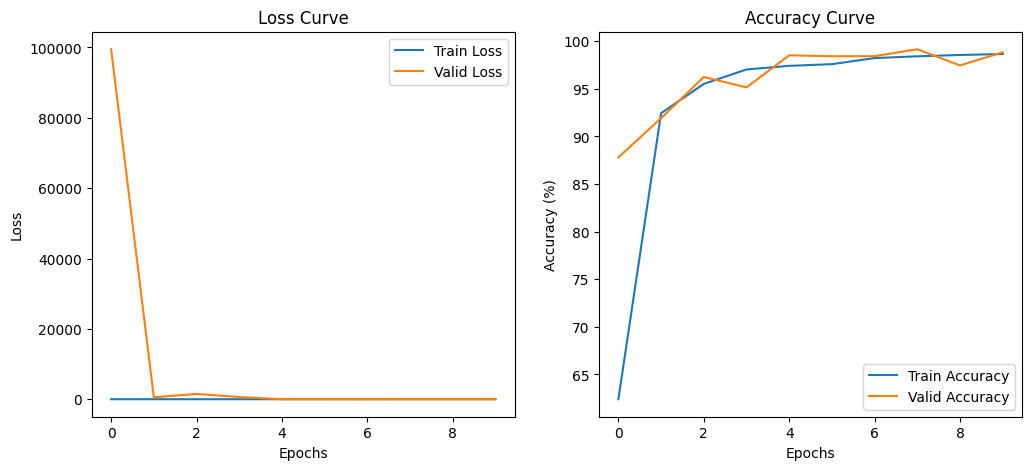

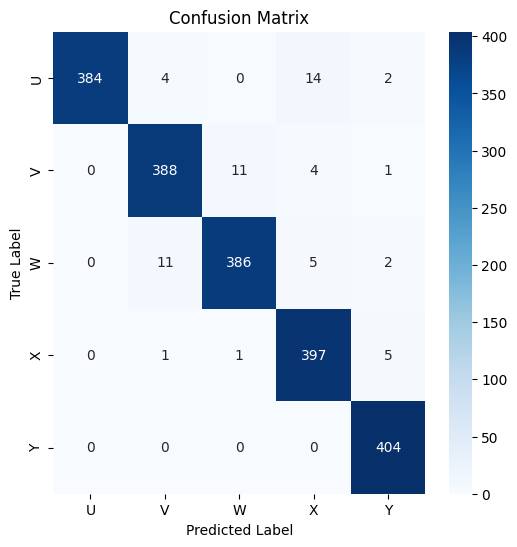

In [ ]:
# Vẽ biểu đồ Loss & Accuracy
plot_metrics(train_losses, valid_losses, train_accs, valid_accs)


# Vẽ Confusion Matrix
class_names = ['U', 'V', 'W', 'X', 'Y']
plot_confusion_matrix(model, test_loader, class_names)

# **Segmentation with DeepLabV3, U-Net, FCN**

**DeepLabV3**

In [ ]:
!pip install torchsummary torchinfo

In [ ]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision.models.segmentation import deeplabv3_resnet50
from torchinfo import summary

In [ ]:
import torch_xla
import torch_xla.core.xla_model as xm
import torch_xla.distributed.parallel_loader as pl


In [ ]:
# ====================== Dataset ======================
class HandSegmentationDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None, target_transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.target_transform = target_transform

        self.image_files = sorted([
            f for f in os.listdir(image_dir)
            if f.endswith('.jpg') and os.path.exists(os.path.join(mask_dir, f))
        ])
        self.mask_files = self.image_files

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.image_files[idx])
        mask_path = os.path.join(self.mask_dir, self.mask_files[idx])

        image = Image.open(img_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")  # "L" = grayscale

        if self.transform:
            image = self.transform(image)

        if self.target_transform:
            mask = self.target_transform(mask)
            mask = (mask > 0).long().squeeze(0)
        else:
            mask = transforms.functional.pil_to_tensor(mask)
            mask = (mask > 0).long().squeeze(0)

        return image, mask


In [ ]:
# ====================== Plot Split ======================
def plot_dataset_split(train_len, val_len, test_len):
    labels = ['Train', 'Val', 'Test']
    counts = [train_len, val_len, test_len]
    plt.figure(figsize=(6, 4))
    bars = plt.bar(labels, counts, color='skyblue')
    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
                 str(count), ha='center', va='bottom', fontsize=10, fontweight='bold')
    plt.title('Dataset Split')
    plt.ylabel('Number of Samples')
    plt.tight_layout()
    #plt.savefig('dataset_split.png')
    plt.show()


In [ ]:
# ====================== DataLoader ======================
def get_dataloaders(image_dir, mask_dir, batch_size=4, num_workers=2):
    image_transform = transforms.Compose([
        transforms.Resize((384, 384)),
        transforms.ToTensor()
    ])
    mask_transform = transforms.Compose([
        transforms.Resize((384, 384)),
        transforms.ToTensor()
    ])
    dataset = HandSegmentationDataset(image_dir, mask_dir, transform=image_transform, target_transform=mask_transform)
    total = len(dataset)
    train_len = int(0.75 * total)
    val_len = int(0.15 * total)
    test_len = total - train_len - val_len

    plot_dataset_split(train_len, val_len, test_len)

    train_set, val_set, test_set = random_split(dataset, [train_len, val_len, test_len])
    train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)
    val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)
    test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)

    return train_loader, val_loader, test_loader


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision.models.resnet import resnet50
from torchvision.models._utils import IntermediateLayerGetter

class ASPPConv(nn.Sequential):
    def __init__(self, in_channels, out_channels, dilation):
        super().__init__(
            nn.Conv2d(in_channels, out_channels, 3, padding=dilation, dilation=dilation, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU()
        )

class ASPPPooling(nn.Sequential):
    def __init__(self, in_channels, out_channels):
        super().__init__(
            nn.AdaptiveAvgPool2d(1),
            nn.Conv2d(in_channels, out_channels, 1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU()
        )

    def forward(self, x):
        size = x.shape[-2:]
        x = super().forward(x)
        return F.interpolate(x, size=size, mode='bilinear', align_corners=False)

class ASPP(nn.Module):
    def __init__(self, in_channels, out_channels, atrous_rates):
        super().__init__()
        self.convs = nn.ModuleList([
            nn.Sequential(
                nn.Conv2d(in_channels, out_channels, 1, bias=False),
                nn.BatchNorm2d(out_channels),
                nn.ReLU()
            ),
            *[ASPPConv(in_channels, out_channels, rate) for rate in atrous_rates],
            ASPPPooling(in_channels, out_channels)
        ])

        self.project = nn.Sequential(
            nn.Conv2d(len(self.convs) * out_channels, out_channels, 1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            nn.Dropout(0.5)
        )

    def forward(self, x):
        res = [conv(x) for conv in self.convs]
        x = torch.cat(res, dim=1)
        return self.project(x)

class DeepLabHead(nn.Sequential):
    def __init__(self, in_channels, num_classes):
        super().__init__(
            ASPP(in_channels, 256, atrous_rates=[12, 24, 36]),
            nn.Conv2d(256, 256, 3, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, num_classes, 1)
        )

class FCNHead(nn.Sequential):
    def __init__(self, in_channels, num_classes):
        super().__init__(
            nn.Conv2d(in_channels, 256, 3, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Conv2d(256, num_classes, 1)
        )

class ResNetBackbone(nn.Module):
    def __init__(self, pretrained=True, replace_stride_with_dilation=[False, True, True]):
        super().__init__()
        resnet = resnet50(pretrained=pretrained, replace_stride_with_dilation=replace_stride_with_dilation)
        return_layers = {"layer4": "out", "layer3": "aux"}
        self.body = IntermediateLayerGetter(resnet, return_layers=return_layers)

    def forward(self, x):
        return self.body(x)

class CustomDeepLabV3(nn.Module):
    def __init__(self, num_classes=21, pretrained_backbone=True):
        super().__init__()
        self.backbone = ResNetBackbone(pretrained=pretrained_backbone)
        self.classifier = DeepLabHead(2048, num_classes)
        self.aux_classifier = FCNHead(1024, num_classes)

    def forward(self, x):
        input_shape = x.shape[-2:]
        features = self.backbone(x)
        x = self.classifier(features['out'])
        x = F.interpolate(x, size=input_shape, mode='bilinear', align_corners=False)

        result = {'out': x}

        if self.training:
            aux = self.aux_classifier(features['aux'])
            aux = F.interpolate(aux, size=input_shape, mode='bilinear', align_corners=False)
            result['aux'] = aux

        return result


In [ ]:
import torch
import torch.nn as nn
from torchvision.models.segmentation import deeplabv3_resnet50
from torchinfo import summary

# ==== Wrapper dùng để hiển thị torchsummary cho backbone ====
class BackboneWrapper(nn.Module):
    def __init__(self, backbone):
        super().__init__()
        self.backbone = backbone.eval()

    def forward(self, x):
        features = self.backbone(x)
        out = features['out']
        if isinstance(out, torch.Tensor):
            return out
        else:
            raise TypeError(f"Expected Tensor but got {type(out)}")

# ==== Hàm load mô hình và nạp weight từ torchvision ====
def load_model(num_classes=2):
    model = CustomDeepLabV3(num_classes=num_classes, pretrained_backbone=True)

    # Lấy model pretrained từ torchvision
    pretrained = deeplabv3_resnet50(pretrained=True)
    pretrained_dict = pretrained.state_dict()
    model_dict = model.state_dict()

    # Lọc ra các weight khớp
    filtered_dict = {k: v for k, v in pretrained_dict.items()
                     if k in model_dict and v.size() == model_dict[k].size()}
    model_dict.update(filtered_dict)
    model.load_state_dict(model_dict)

    return model

# ==== Tạo model ====
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = load_model(num_classes=2)
torch.cuda.empty_cache()

# ==== Hiển thị cấu trúc backbone ====
print("\nBackbone (ResNet50):")
summary(BackboneWrapper(model.backbone).to("cpu"), input_size=(1, 3, 384, 384), device='cpu', verbose=1)

# ==== Hiển thị cấu trúc classifier head ====
print("\nClassifier Head (ASPP + Final Conv):")
# Lấy shape đầu vào từ forward
with torch.no_grad():
    dummy = torch.randn(1, 3, 384, 384)
    features = model.backbone(dummy)
    classifier_input = features['out'].shape[1:]  # (2048, H, W)
summary(model.classifier.to("cpu"), input_size=(1, *classifier_input), device='cpu', verbose=1)

# ==== In tổng số tham số ====
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"\nTotal Parameters: {total_params:,}")
print(f"Trainable Parameters: {trainable_params:,}")

# ==== Đưa model lại về thiết bị chính ====
model = model.to(device)



Backbone (ResNet50):
Layer (type:depth-idx)                             Output Shape              Param #
BackboneWrapper                                    [1, 2048, 48, 48]         --
├─ResNetBackbone: 1-1                              [1, 2048, 48, 48]         --
│    └─IntermediateLayerGetter: 2-1                [1, 2048, 48, 48]         --
│    │    └─Conv2d: 3-1                            [1, 64, 192, 192]         9,408
│    │    └─BatchNorm2d: 3-2                       [1, 64, 192, 192]         128
│    │    └─ReLU: 3-3                              [1, 64, 192, 192]         --
│    │    └─MaxPool2d: 3-4                         [1, 64, 96, 96]           --
│    │    └─Sequential: 3-5                        [1, 256, 96, 96]          215,808
│    │    └─Sequential: 3-6                        [1, 512, 48, 48]          1,219,584
│    │    └─Sequential: 3-7                        [1, 1024, 48, 48]         7,098,368
│    │    └─Sequential: 3-8                        [1, 2048, 48, 48]  

In [ ]:
# ====================== Train & Validation ======================
def train_fn(model, loader, optimizer, criterion, device):
    model.train()
    total_loss, correct, total = 0, 0, 0
    for images, masks in tqdm(loader, desc="Training"):
        images, masks = images.to(device), masks.to(device)
        optimizer.zero_grad()
        outputs = model(images)['out']
        loss = criterion(outputs, masks)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        preds = outputs.argmax(1)
        correct += (preds == masks).sum().item()
        total += masks.numel()
    return total_loss / len(loader), correct / total


def validate_fn(model, loader, criterion, device):
    model.eval()
    total_loss, correct, total = 0, 0, 0
    with torch.no_grad():
        for images, masks in tqdm(loader, desc="Validating"):
            images, masks = images.to(device), masks.to(device)
            outputs = model(images)['out']
            loss = criterion(outputs, masks)
            total_loss += loss.item()
            preds = outputs.argmax(1)
            correct += (preds == masks).sum().item()
            total += masks.numel()
    return total_loss / len(loader), correct / total

In [ ]:
# ====================== Plot Metrics ======================
def plot_metrics(train_loss, val_loss, train_acc, val_acc):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='Train Loss')
    plt.plot(val_loss, label='Val Loss')
    plt.title('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='Train Acc')
    plt.plot(val_acc, label='Val Acc')
    plt.title('Accuracy')
    plt.legend()

    plt.tight_layout()
    #plt.savefig("training_metrics.png")
    plt.show()

In [ ]:
# ====================== Evaluation ======================
def evaluate(model, loader, device):
    model.eval()
    iou_total, dice_total, correct_pixels, total_pixels = 0, 0, 0, 0
    epsilon = 1e-6
    with torch.no_grad():
        for images, masks in tqdm(loader, desc="Testing"):
            images, masks = images.to(device), masks.to(device)
            outputs = model(images)['out']
            preds = outputs.argmax(1)
            preds_flat = preds.view(-1)
            masks_flat = masks.view(-1)

            intersection = ((preds_flat == 1) & (masks_flat == 1)).sum().float()
            union = ((preds_flat == 1) | (masks_flat == 1)).sum().float()
            correct = (preds_flat == masks_flat).sum().float()
            total = masks_flat.numel()

            iou = (intersection / (union + epsilon)).item()
            dice = (2 * intersection / (2 * intersection + (union - intersection) + epsilon)).item()
            acc = (correct / total).item()

            iou_total += iou
            dice_total += dice
            correct_pixels += correct
            total_pixels += total

    print("Evaluation Results:")
    print(f"Mean IoU:       {(iou_total / len(loader))*100:.2f}%")
    print(f"Dice (F1 Score):{(dice_total / len(loader))*100:.2f}%")
    print(f"Pixel Accuracy: {(correct_pixels / total_pixels)*100:.2f}%")


In [ ]:
# ====================== Train Loop ======================
def train_loop(flags):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    train_loader, val_loader, test_loader = get_dataloaders(
        flags['image_dir'], flags['mask_dir'], flags['batch_size'], flags['num_workers']
    )

    model = load_model(num_classes=2)
    model = model.to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr=flags['lr'])
    criterion = nn.CrossEntropyLoss()

    train_losses, val_losses, train_accs, val_accs = [], [], [], []

    for epoch in range(flags['epochs']):
        print(f"Epoch {epoch+1}/{flags['epochs']}")
        train_loss, train_acc = train_fn(model, train_loader, optimizer, criterion, device)
        val_loss, val_acc = validate_fn(model, val_loader, criterion, device)

        print(f"Train Loss: {train_loss:.4f}, Acc: {train_acc*100:.2f}%")
        print(f"Val Loss: {val_loss:.4f}, Acc: {val_acc*100:.2f}%")

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accs.append(train_acc)
        val_accs.append(val_acc)

    torch.save(model.state_dict(), "deeplab_segmet_model.pth")
    print("Model saved as deeplab_segmet_model.pth")
    plot_metrics(train_losses, val_losses, train_accs, val_accs)
    evaluate(model, test_loader, device)


Using device: cuda


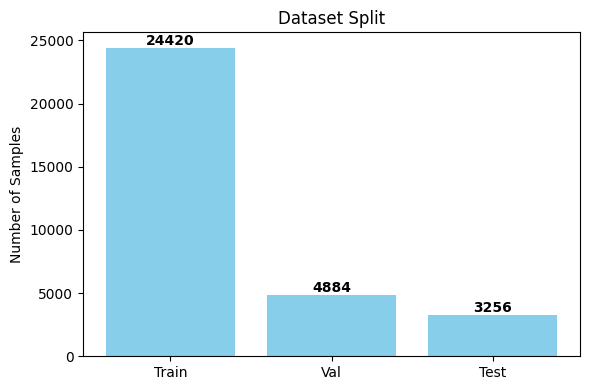

Epoch 1/10


Validating: 100%|██████████| 306/306 [00:22<00:00, 13.69it/s]


Train Loss: 0.0709, Acc: 97.63%
Val Loss: 0.0494, Acc: 97.91%
Epoch 2/10


Validating: 100%|██████████| 306/306 [00:21<00:00, 13.95it/s]


Train Loss: 0.0467, Acc: 97.97%
Val Loss: 0.0458, Acc: 97.99%
Epoch 3/10


Validating: 100%|██████████| 306/306 [00:22<00:00, 13.76it/s]


Train Loss: 0.0436, Acc: 98.07%
Val Loss: 0.0451, Acc: 98.02%
Epoch 4/10


Validating: 100%|██████████| 306/306 [00:22<00:00, 13.86it/s]


Train Loss: 0.0416, Acc: 98.14%
Val Loss: 0.0433, Acc: 98.08%
Epoch 5/10


Validating: 100%|██████████| 306/306 [00:22<00:00, 13.78it/s]


Train Loss: 0.0397, Acc: 98.21%
Val Loss: 0.0417, Acc: 98.14%
Epoch 6/10


Validating: 100%|██████████| 306/306 [00:22<00:00, 13.64it/s]


Train Loss: 0.0380, Acc: 98.27%
Val Loss: 0.0417, Acc: 98.15%
Epoch 7/10


Validating: 100%|██████████| 306/306 [00:22<00:00, 13.75it/s]


Train Loss: 0.0367, Acc: 98.31%
Val Loss: 0.0411, Acc: 98.18%
Epoch 8/10


Validating: 100%|██████████| 306/306 [00:22<00:00, 13.66it/s]


Train Loss: 0.0353, Acc: 98.36%
Val Loss: 0.0413, Acc: 98.19%
Epoch 9/10


Validating: 100%|██████████| 306/306 [00:21<00:00, 13.92it/s]


Train Loss: 0.0340, Acc: 98.41%
Val Loss: 0.0420, Acc: 98.19%
Epoch 10/10


Validating: 100%|██████████| 306/306 [00:22<00:00, 13.88it/s]


Train Loss: 0.0329, Acc: 98.44%
Val Loss: 0.0427, Acc: 98.17%
Model saved as deeplab_segmet_model.pth


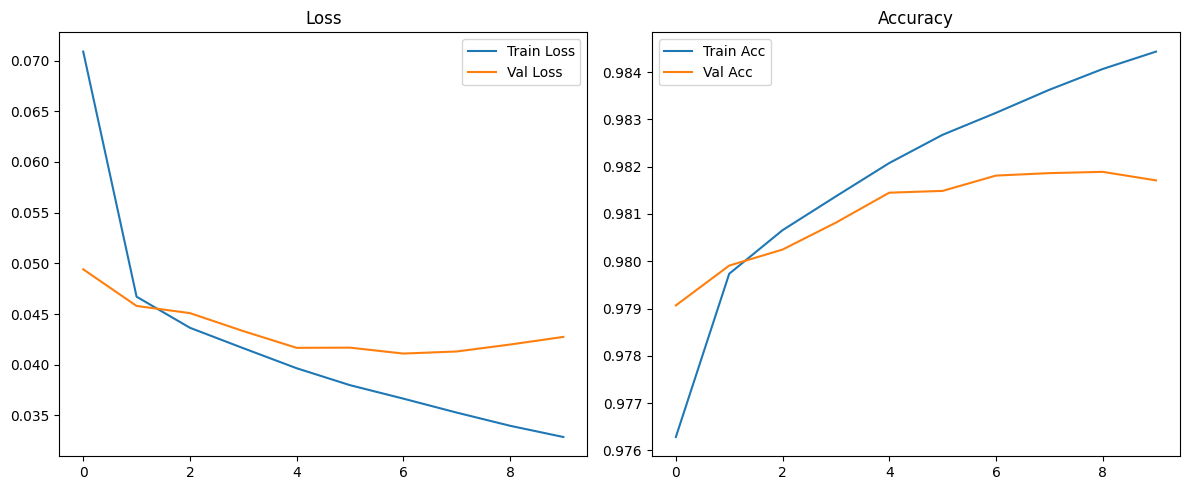

Testing: 100%|██████████| 204/204 [00:15<00:00, 13.49it/s]

Evaluation Results:
Mean IoU:       84.95%
Dice (F1 Score):91.86%
Pixel Accuracy: 98.16%


In [ ]:
FLAGS = {
        'image_dir': '/content/drive/MyDrive/Colab Notebooks/DeepLearning/Project/segment_img/rgb',
        'mask_dir': '/content/drive/MyDrive/Colab Notebooks/DeepLearning/Project/segment_img/mask',
        'batch_size': 16,
        'epochs': 10,
        'lr': 1e-4,
        'num_workers': 4
    }

train_loop(FLAGS)

**U-Net**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
from torchvision.models import resnet34

# Conv-BN-ReLU block
class Conv2dReLU(nn.Sequential):
    def __init__(self, in_channels, out_channels):
        super().__init__(
            nn.Conv2d(in_channels, out_channels, 3, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

# Decoder block
class DecoderBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv1 = Conv2dReLU(in_channels, out_channels)
        self.conv2 = Conv2dReLU(out_channels, out_channels)

    def forward(self, x, skip=None):
        x = F.interpolate(x, scale_factor=2, mode='bilinear', align_corners=False)
        if skip is not None:
            x = torch.cat([x, skip], dim=1)
        x = self.conv1(x)
        x = self.conv2(x)
        return x

# Full U-Net with ResNet-34 encoder
class UNetResNet34(nn.Module):
    def __init__(self, num_classes=1, pretrained=True):
        super().__init__()
        resnet = resnet34(pretrained=pretrained)

        self.encoder0 = nn.Sequential(resnet.conv1, resnet.bn1, resnet.relu)  # [64, H/2]
        self.encoder1 = nn.Sequential(resnet.maxpool, resnet.layer1)          # [64, H/4]
        self.encoder2 = resnet.layer2                                          # [128, H/8]
        self.encoder3 = resnet.layer3                                          # [256, H/16]
        self.encoder4 = resnet.layer4                                          # [512, H/32]

        self.center = nn.Identity()

        self.decoder4 = DecoderBlock(512 + 256, 256)
        self.decoder3 = DecoderBlock(256 + 128, 128)
        self.decoder2 = DecoderBlock(128 + 64, 64)
        self.decoder1 = DecoderBlock(64 + 64, 32)
        self.decoder0 = DecoderBlock(32, 16)

        self.segmentation_head = nn.Sequential(
            nn.Conv2d(16, num_classes, kernel_size=3, padding=1),
            nn.Identity()
        )

    def forward(self, x):
        e0 = self.encoder0(x)
        e1 = self.encoder1(e0)
        e2 = self.encoder2(e1)
        e3 = self.encoder3(e2)
        e4 = self.encoder4(e3)

        x = self.center(e4)
        x = self.decoder4(x, e3)
        x = self.decoder3(x, e2)
        x = self.decoder2(x, e1)
        x = self.decoder1(x, e0)
        x = self.decoder0(x)

        out = self.segmentation_head(x)
        return out

# Hàm load_model chuẩn như yêu cầu
def load_model(num_classes=1):
    return UNetResNet34(num_classes=num_classes, pretrained=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load model với num_classes = 1 (binary segmentation)
model = load_model(num_classes=1).to(device)
summary(model, (3, 384, 384))

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 192, 192]           9,408
       BatchNorm2d-2         [-1, 64, 192, 192]             128
              ReLU-3         [-1, 64, 192, 192]               0
         MaxPool2d-4           [-1, 64, 96, 96]               0
            Conv2d-5           [-1, 64, 96, 96]          36,864
       BatchNorm2d-6           [-1, 64, 96, 96]             128
              ReLU-7           [-1, 64, 96, 96]               0
            Conv2d-8           [-1, 64, 96, 96]          36,864
       BatchNorm2d-9           [-1, 64, 96, 96]             128
             ReLU-10           [-1, 64, 96, 96]               0
       BasicBlock-11           [-1, 64, 96, 96]               0
           Conv2d-12           [-1, 64, 96, 96]          36,864
      BatchNorm2d-13           [-1, 64, 96, 96]             128
             ReLU-14           [-1, 64,

In [ ]:
from tqdm import tqdm

def train_one_epoch(model, loader, optimizer, criterion, device):
    model.train()
    total_loss = 0.0
    correct = 0
    total = 0

    loop = tqdm(loader, desc="Training", leave=False)
    for images, masks in loop:
        images, masks = images.to(device), masks.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, masks)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        preds = outputs.argmax(dim=1)
        correct += (preds == masks).sum().item()
        total += masks.numel()

        # cập nhật thanh tqdm
        loop.set_postfix(loss=loss.item())

    avg_loss = total_loss / len(loader)
    accuracy = correct / total
    return avg_loss, accuracy


def validate(model, loader, criterion, device):
    model.eval()
    total_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        loop = tqdm(loader, desc="Validating", leave=False)
        for images, masks in loop:
            images, masks = images.to(device), masks.to(device)
            outputs = model(images)
            loss = criterion(outputs, masks)

            total_loss += loss.item()
            preds = outputs.argmax(dim=1)
            correct += (preds == masks).sum().item()
            total += masks.numel()

            loop.set_postfix(loss=loss.item())

    avg_loss = total_loss / len(loader)
    accuracy = correct / total
    return avg_loss, accuracy

In [ ]:
def plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies):
    # ==== Vẽ biểu đồ Loss ====
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label="Train Loss")
    plt.plot(val_losses, label="Val Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Loss per Epoch")
    plt.legend()
    plt.grid()

    # ==== Vẽ biểu đồ Accuracy ====
    plt.subplot(1, 2, 2)
    plt.plot([acc * 100 for acc in train_accuracies], label="Train Acc")
    plt.plot([acc * 100 for acc in val_accuracies], label="Val Acc")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy (%)")
    plt.title("Accuracy per Epoch")
    plt.legend()
    plt.grid()

In [ ]:
# ====================== Evaluation ======================
def evaluate(model, loader, device):
    model.eval()
    iou_total, dice_total, correct_pixels, total_pixels = 0, 0, 0, 0
    epsilon = 1e-6
    with torch.no_grad():
        for images, masks in tqdm(loader, desc="Testing"):
            images, masks = images.to(device), masks.to(device)
            outputs = model(images)
            preds = outputs.argmax(1)
            preds_flat = preds.view(-1)
            masks_flat = masks.view(-1)

            intersection = ((preds_flat == 1) & (masks_flat == 1)).sum().float()
            union = ((preds_flat == 1) | (masks_flat == 1)).sum().float()
            correct = (preds_flat == masks_flat).sum().float()
            total = masks_flat.numel()

            iou = (intersection / (union + epsilon)).item()
            dice = (2 * intersection / (2 * intersection + (union - intersection) + epsilon)).item()
            acc = (correct / total).item()

            iou_total += iou
            dice_total += dice
            correct_pixels += correct
            total_pixels += total

    print("Evaluation Results:")
    print(f"Mean IoU:       {(iou_total / len(loader))*100:.2f}%")
    print(f"Dice (F1 Score):{(dice_total / len(loader))*100:.2f}%")
    print(f"Pixel Accuracy: {(correct_pixels / total_pixels)*100:.2f}%")


In [ ]:
# ====================== Train Loop ======================
def train_loop(flags):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    train_loader, val_loader, test_loader = get_dataloaders(
        flags['image_dir'], flags['mask_dir'], flags['batch_size'], flags['num_workers']
    )

    model = load_model(num_classes=2)
    model = model.to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr=flags['lr'])
    criterion = nn.CrossEntropyLoss()

    train_losses, val_losses, train_accs, val_accs = [], [], [], []

    for epoch in range(flags['epochs']):
        print(f"Epoch {epoch+1}/{flags['epochs']}")
        train_loss, train_acc = train_one_epoch(model, train_loader, optimizer, criterion, device)
        val_loss, val_acc = validate(model, val_loader, criterion, device)

        print(f"Train Loss: {train_loss:.4f}, Acc: {train_acc*100:.2f}%")
        print(f"Val Loss: {val_loss:.4f}, Acc: {val_acc*100:.2f}%")

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accs.append(train_acc)
        val_accs.append(val_acc)

    torch.save(model.state_dict(), "unet_segment_model.pth")
    print("Model saved as unet_segment_model.pth")
    plot_metrics(train_losses, val_losses, train_accs, val_accs)
    evaluate(model, test_loader, device)


Using device: cuda


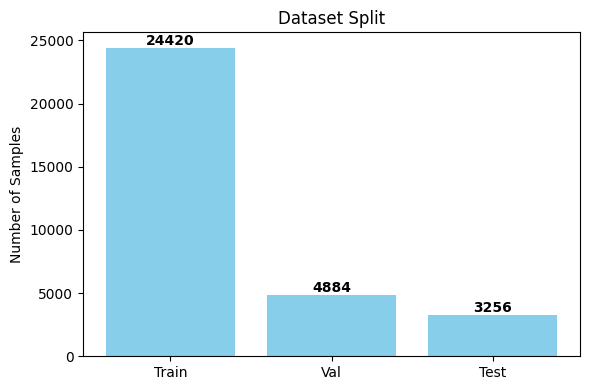

Epoch 1/10


Train Loss: 0.0724, Acc: 97.63%
Val Loss: 0.0512, Acc: 97.82%
Epoch 2/10


Train Loss: 0.0481, Acc: 97.92%
Val Loss: 0.0467, Acc: 97.95%
Epoch 3/10


Train Loss: 0.0447, Acc: 98.02%
Val Loss: 0.0453, Acc: 97.99%
Epoch 4/10


Train Loss: 0.0424, Acc: 98.10%
Val Loss: 0.0454, Acc: 97.99%
Epoch 5/10


Train Loss: 0.0407, Acc: 98.16%
Val Loss: 0.0454, Acc: 98.02%
Epoch 6/10


Train Loss: 0.0388, Acc: 98.23%
Val Loss: 0.0430, Acc: 98.10%
Epoch 7/10


Train Loss: 0.0367, Acc: 98.30%
Val Loss: 0.0421, Acc: 98.13%
Epoch 8/10


Train Loss: 0.0352, Acc: 98.35%
Val Loss: 0.0415, Acc: 98.15%
Epoch 9/10


Train Loss: 0.0335, Acc: 98.41%
Val Loss: 0.0423, Acc: 98.16%
Epoch 10/10


Train Loss: 0.0324, Acc: 98.45%
Val Loss: 0.0431, Acc: 98.16%
Model saved as unet_segment_model.pth


Testing: 100%|██████████| 204/204 [00:15<00:00, 13.52it/s]


Evaluation Results:
Mean IoU:       84.99%
Dice (F1 Score):91.89%
Pixel Accuracy: 98.15%


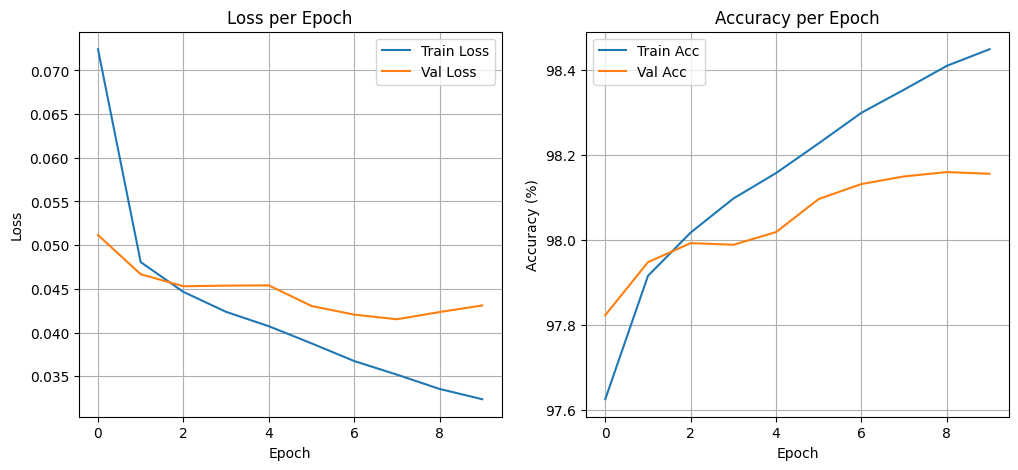

In [ ]:
FLAGS = {
        'image_dir': '/content/drive/MyDrive/Colab Notebooks/DeepLearning/Project/segment_img/rgb',
        'mask_dir': '/content/drive/MyDrive/Colab Notebooks/DeepLearning/Project/segment_img/mask',
        'batch_size': 16,
        'epochs': 10,
        'lr': 1e-4,
        'num_workers': 4
    }

train_loop(FLAGS)

**FCN**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision.models import resnet50
from torchvision.models._utils import IntermediateLayerGetter
from torchinfo import summary

# FCN Head module (giống torchvision)
class FCNHead(nn.Sequential):
    def __init__(self, in_channels, channels, num_classes):
        super().__init__(
            nn.Conv2d(in_channels, channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(channels),
            nn.ReLU(inplace=True),
            nn.Dropout(0.1),
            nn.Conv2d(channels, num_classes, kernel_size=1)
        )

# Full FCN model (ResNet50 backbone)
class CustomFCN101(nn.Module):
    def __init__(self, num_classes=21, pretrained_backbone=True):
        super().__init__()
        backbone = resnet50(
            pretrained=pretrained_backbone,
            replace_stride_with_dilation=[False, True, True]
        )
        return_layers = {'layer4': 'out', 'layer3': 'aux'}
        self.backbone = IntermediateLayerGetter(backbone, return_layers=return_layers)

        self.classifier = FCNHead(2048, 512, num_classes)
        self.aux_classifier = FCNHead(1024, 256, num_classes)

    def forward(self, x):
        input_shape = x.shape[-2:]
        features = self.backbone(x)

        x = self.classifier(features["out"])
        x = F.interpolate(x, size=input_shape, mode="bilinear", align_corners=False)

        result = {"out": x}
        if self.training:
            aux = self.aux_classifier(features["aux"])
            aux = F.interpolate(aux, size=input_shape, mode="bilinear", align_corners=False)
            result["aux"] = aux
        return result

# Hàm tiện lợi để load
def load_model(num_classes=2):
    return CustomFCN101(num_classes=num_classes, pretrained_backbone=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = load_model(num_classes=2).to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 193MB/s]


In [ ]:
x = torch.randn(1, 3, 384, 384)

# ======= Summary backbone =======
print("\nBackbone (ResNet50):")

class BackboneWrapper(nn.Module):
    def __init__(self, backbone):
        super().__init__()
        self.backbone = backbone.eval()

    def forward(self, x):
        return self.backbone(x)['out']  # chỉ lấy output chính

backbone = BackboneWrapper(model.backbone).to("cpu")
summary(backbone, input_size=(1, 3, 384, 384), device='cpu', verbose=1)

# ======= Summary classifier =======
print("\nClassifier Head (FCN Head):")

with torch.no_grad():
    features = model.backbone(x)
    classifier_input = features["out"].shape[1:]  # Bỏ batch

summary(model.classifier.to("cpu"), input_size=(1, *classifier_input), device='cpu', verbose=1)

# ======= Tổng số tham số =======
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"\nTotal Parameters: {total_params:,}")
print(f"Trainable Parameters: {trainable_params:,}")
model = load_model(num_classes=2).to(device)


Backbone (ResNet50):
Layer (type:depth-idx)                        Output Shape              Param #
BackboneWrapper                               [1, 2048, 48, 48]         --
├─IntermediateLayerGetter: 1-1                [1, 2048, 48, 48]         --
│    └─Conv2d: 2-1                            [1, 64, 192, 192]         9,408
│    └─BatchNorm2d: 2-2                       [1, 64, 192, 192]         128
│    └─ReLU: 2-3                              [1, 64, 192, 192]         --
│    └─MaxPool2d: 2-4                         [1, 64, 96, 96]           --
│    └─Sequential: 2-5                        [1, 256, 96, 96]          --
│    │    └─Bottleneck: 3-1                   [1, 256, 96, 96]          75,008
│    │    └─Bottleneck: 3-2                   [1, 256, 96, 96]          70,400
│    │    └─Bottleneck: 3-3                   [1, 256, 96, 96]          70,400
│    └─Sequential: 2-6                        [1, 512, 48, 48]          --
│    │    └─Bottleneck: 3-4                   [1, 512, 48

In [ ]:
from tqdm import tqdm

def train_one_epoch(model, loader, optimizer, loss_fn, device):
    model.train()
    running_loss = 0.0
    correct_pixels = 0
    total_pixels = 0

    loop = tqdm(loader, desc="Train", leave=False)
    for images, masks in loop:
        images, masks = images.to(device), masks.to(device).long()

        optimizer.zero_grad()
        outputs = model(images)['out']
        loss = loss_fn(outputs, masks)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        preds = outputs.argmax(dim=1)
        correct_pixels += (preds == masks).sum().item()
        total_pixels += masks.numel()

        loop.set_postfix(loss=loss.item())

    avg_loss = running_loss / len(loader)
    accuracy = correct_pixels / total_pixels
    return avg_loss, accuracy


def validate(model, loader, loss_fn, device):
    model.eval()
    total_loss = 0.0
    correct_pixels = 0
    total_pixels = 0

    loop = tqdm(loader, desc="Valid", leave=False)
    with torch.no_grad():
        for images, masks in loop:
            images, masks = images.to(device), masks.to(device).long()

            outputs = model(images)['out']
            loss = loss_fn(outputs, masks)
            total_loss += loss.item()

            preds = outputs.argmax(dim=1)
            correct_pixels += (preds == masks).sum().item()
            total_pixels += masks.numel()

            loop.set_postfix(loss=loss.item())

    avg_loss = total_loss / len(loader)
    accuracy = correct_pixels / total_pixels
    return avg_loss, accuracy

In [ ]:
import matplotlib.pyplot as plt
import torch
from tqdm import tqdm

def train_loop(model, train_loader, val_loader, optimizer, loss_fn, device, epochs=10, save_path="best_model.pth"):
    best_loss = float("inf")

    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(epochs):
        print(f"\nEpoch {epoch+1}/{epochs}")

        train_loss, train_acc = train_one_epoch(model, train_loader, optimizer, loss_fn, device)
        val_loss, val_acc = validate(model, val_loader, loss_fn, device)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)

        print(f"Train Loss: {train_loss:.4f} | Acc: {train_acc*100:.2f}%")
        print(f"Val   Loss: {val_loss:.4f} | Acc: {val_acc*100:.2f}%")

        if val_loss < best_loss:
            best_loss = val_loss
            torch.save(model.state_dict(), save_path)
            print(f"Model saved to {save_path}")

    # ==== Vẽ biểu đồ Loss ====
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label="Train Loss")
    plt.plot(val_losses, label="Val Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Loss per Epoch")
    plt.legend()
    plt.grid()

    # ==== Vẽ biểu đồ Accuracy ====
    plt.subplot(1, 2, 2)
    plt.plot([acc * 100 for acc in train_accuracies], label="Train Acc")
    plt.plot([acc * 100 for acc in val_accuracies], label="Val Acc")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy (%)")
    plt.title("Accuracy per Epoch")
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()


In [ ]:
def evaluate(model, loader, device, num_classes=2):
    model.eval()
    iou_total, dice_total, correct_pixels, total_pixels = 0, 0, 0, 0
    epsilon = 1e-6

    with torch.no_grad():
        for images, masks in tqdm(loader, desc="Testing"):
            images, masks = images.to(device), masks.to(device)
            outputs = model(images)['out']
            preds = outputs.argmax(1)

            for cls in range(1, num_classes):  # ignore background class
                pred_cls = (preds == cls)
                mask_cls = (masks == cls)

                intersection = (pred_cls & mask_cls).sum().float()
                union = (pred_cls | mask_cls).sum().float()

                dice = (2 * intersection / (pred_cls.sum() + mask_cls.sum() + epsilon)).item()
                iou = (intersection / (union + epsilon)).item()

                iou_total += iou
                dice_total += dice

            correct_pixels += (preds == masks).sum().float()
            total_pixels += masks.numel()

    print(f"\nEvaluation Metrics:")
    print(f"Mean IoU:       {(iou_total / ((num_classes - 1) * len(loader))) * 100:.2f}%")
    print(f"Dice (F1):      {(dice_total / ((num_classes - 1) * len(loader))) * 100:.2f}%")
    print(f"Pixel Accuracy: {(correct_pixels / total_pixels) * 100:.2f}%")


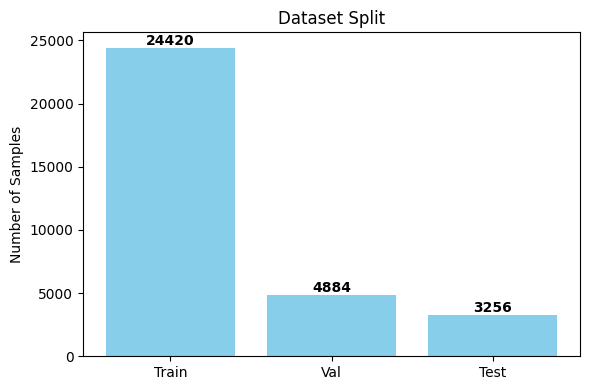


Epoch 1/10


Train Loss: 0.0601 | Acc: 97.63%
Val   Loss: 0.0490 | Acc: 97.89%
Model saved to best_model.pth

Epoch 2/10


Train Loss: 0.0466 | Acc: 97.97%
Val   Loss: 0.0476 | Acc: 97.92%
Model saved to best_model.pth

Epoch 3/10


Train Loss: 0.0442 | Acc: 98.05%
Val   Loss: 0.0454 | Acc: 97.99%
Model saved to best_model.pth

Epoch 4/10


Train Loss: 0.0420 | Acc: 98.13%
Val   Loss: 0.0454 | Acc: 98.00%
Model saved to best_model.pth

Epoch 5/10


Train Loss: 0.0407 | Acc: 98.17%
Val   Loss: 0.0450 | Acc: 98.02%
Model saved to best_model.pth

Epoch 6/10


Train Loss: 0.0389 | Acc: 98.24%
Val   Loss: 0.0439 | Acc: 98.07%
Model saved to best_model.pth

Epoch 7/10


Train Loss: 0.0373 | Acc: 98.30%
Val   Loss: 0.0438 | Acc: 98.09%
Model saved to best_model.pth

Epoch 8/10


Train Loss: 0.0358 | Acc: 98.35%
Val   Loss: 0.0440 | Acc: 98.09%

Epoch 9/10


Train Loss: 0.0342 | Acc: 98.40%
Val   Loss: 0.0441 | Acc: 98.10%

Epoch 10/10


Train Loss: 0.0328 | Acc: 98.45%
Val   Loss: 0.0447 | Acc: 98.10%


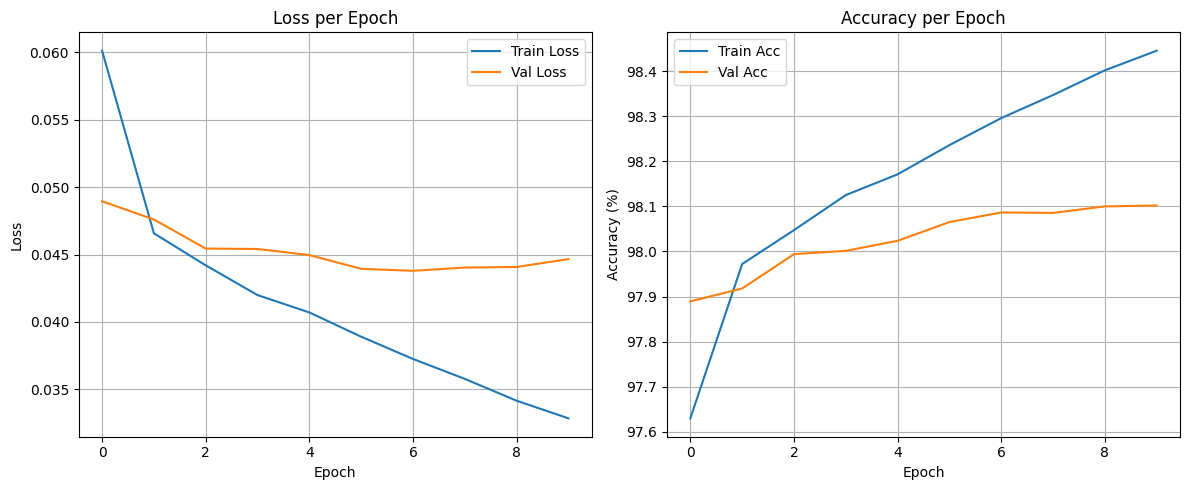

Testing: 100%|██████████| 102/102 [16:44<00:00,  9.85s/it]


Evaluation Metrics:
Mean IoU:       84.48%
Dice (F1):      91.59%
Pixel Accuracy: 98.11%


In [ ]:
model = load_model(num_classes=2).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
loss_fn = nn.CrossEntropyLoss()

flags = {
        'image_dir': '/content/drive/MyDrive/Colab Notebooks/DeepLearning/Project/segment_img/rgb',
        'mask_dir': '/content/drive/MyDrive/Colab Notebooks/DeepLearning/Project/segment_img/mask',
        'batch_size': 32,
        'epochs': 10,
        'lr': 1e-4,
        'num_workers': 2
    }
train_loader, val_loader, test_loader = get_dataloaders(
        flags['image_dir'], flags['mask_dir'], flags['batch_size'], flags['num_workers']
    )

train_loop(model, train_loader, val_loader, optimizer, loss_fn, device)
model.load_state_dict(torch.load("best_model.pth"))
evaluate(model, test_loader, device)

## **Resnet50_FineTuning** 

In [13]:
# prompt: connect to drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, random_split
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
from torchsummary import summary
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

In [15]:
# Kiểm tra thiết bị GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Transform cho ảnh đầu vào ResNet-50 train và test riêng biệt
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),   # Lật ngẫu nhiên ảnh
    transforms.ColorJitter(brightness=0.2, contrast=0.2),  # Thay đổi sáng tối
    transforms.RandomRotation(15),  # Xoay tối đa 15 độ
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

transform_test = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load dataset từ thư mục
train_folder = "/content/drive/MyDrive/Colab Notebooks/DeepLearning/Project/Dataset/train"
test_folder = "/content/drive/MyDrive/Colab Notebooks/DeepLearning/Project/Dataset/test"

# Tạo dataset
dataset_train = datasets.ImageFolder(root=train_folder, transform=transform_train)
dataset_test = datasets.ImageFolder(root=test_folder, transform=transform_test)

# Chia tập train thành 80% train, 20% validation
train_size = int(0.8 * len(dataset_train))
valid_size = len(dataset_train) - train_size
train_dataset, valid_dataset = random_split(dataset_train, [train_size, valid_size])

# Dataloader tối ưu cho GPU
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4, pin_memory=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)
test_loader = DataLoader(dataset_test, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)

# Kiểm tra số lượng ảnh trong từng tập
print(f"Train size: {len(train_dataset)}, Validation size: {len(valid_dataset)}, Test size: {len(dataset_test)}")

Using device: cuda
Train size: 60992, Validation size: 15248, Test size: 2020


Fine Tuning ResNet50 với 2 giai đoạn
GĐ1: Chỉ train FC tùy chỉnh (freeze toàn bộ backbone)
GĐ2 : Fine-tuning thêm các lớp trong Backbone (layer3 + layer4)

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader, Dataset
from torch.optim.lr_scheduler import ReduceLROnPlateau
import os
from PIL import Image
import numpy as np
from tqdm import tqdm

In [17]:
class CustomFCHead(nn.Module):
    def __init__(self, in_features=2048, num_classes=5, dropout=0.5):
        super(CustomFCHead, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(in_features, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Dropout(dropout),

            nn.Linear(1024, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(dropout),

            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        return self.classifier(x)

In [18]:
len(dataset_train.classes)

5

In [19]:
print(dataset_train.classes)

['U', 'V', 'W', 'X', 'Y']


In [20]:
# 5. Khởi tạo mô hình với lớp FC tùy chỉnh
model = models.resnet50(pretrained=True)
model.fc = CustomFCHead(model.fc.in_features, len(dataset_train.classes))  # Thay bằng lớp FC mới

In [21]:


model = model.to(device)

# Print the model summary
summary(model, (3, 224, 224))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [22]:
# train 1 epoch
def train_one_epoch(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    progress_bar = tqdm(train_loader, desc="Training", leave=False)

    for images, labels in progress_bar:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

        progress_bar.set_postfix(loss=f"{running_loss / (total // images.size(0)):.4f}", acc=f"{correct / total:.4f}")

    train_acc = correct / total
    return running_loss / len(train_loader), train_acc


#  Hàm validate 1 epoch
def validate_one_epoch(model, valid_loader, criterion, device):
    model.eval()
    val_loss, correct, total = 0.0, 0, 0

    progress_bar = tqdm(valid_loader, desc="Validating", leave=False)

    with torch.no_grad():
        for images, labels in progress_bar:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

            progress_bar.set_postfix(loss=f"{val_loss / (total // images.size(0)):.4f}", acc=f"{correct / total:.4f}")

    val_acc = correct / total
    return val_loss / len(valid_loader), val_acc

In [23]:
# 8. Train loop
def train_loop(model, train_loader, valid_loader, criterion, optimizer, scheduler, epochs, patience, device):
    best_val_loss = np.inf
    patience_counter = 0

    # Lưu lại lịch sử training
    train_losses, valid_losses = [], []
    train_accs, valid_accs = [], []

    for epoch in range(epochs):
        # Train & Validate 1 epoch
        train_loss, train_acc = train_one_epoch(model, train_loader, criterion, optimizer, device)
        val_loss, val_acc = validate_one_epoch(model, valid_loader, criterion, device)

        # Lưu lại loss & accuracy
        train_losses.append(train_loss)
        valid_losses.append(val_loss)
        train_accs.append(train_acc)
        valid_accs.append(val_acc)

        # In ra kết quả mỗi epoch
        print(f" Epoch [{epoch+1}/{epochs}] - "
              f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | "
              f"Valid Loss: {val_loss:.4f} | Valid Acc: {val_acc:.4f}")

        # Step scheduler nếu có
        if scheduler:
            scheduler.step(val_loss)

        # Lưu model tốt nhất
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
            torch.save(model.state_dict(), "/content/drive/MyDrive/Colab Notebooks/DeepLearning/Project/Model/model_resnet50_fc.pth")
        else:
            patience_counter += 1
            print(f" Early Stopping Counter: {patience_counter}/{patience}")
            if patience_counter >= patience:
                print(" Early Stopping Triggered! Training Stopped.")
                break

    return train_losses, valid_losses, train_accs, valid_accs

In [24]:
#  Giai đoạn 1: Chỉ train FC tùy chỉnh (freeze toàn bộ backbone)
for param in model.parameters():
    param.requires_grad = False
for param in model.fc.parameters():
    param.requires_grad = True

# Tạo optimizer
optimizer = optim.Adam(model.fc.parameters(), lr=1e-3, weight_decay=1e-4) #L2 regularization  weight_decay
scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=3, verbose=True) #Khi giá trị loss giảm, learning rate sẽ được giảm. Đây là chế độ tốt khi muốn giảm learning rate khi không có cải thiện trên loss

# Thiết lập device và loss function
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)
criterion = nn.CrossEntropyLoss()

print("=== Giai đoạn 1: Training FC ===")
train_losses_stage1, valid_losses_stage1, train_accs_stage1, valid_accs_stage1 = train_loop(model, train_loader, valid_loader, criterion, optimizer, scheduler, epochs=10, patience=3, device=device)

=== Giai đoạn 1: Training FC ===


 Epoch [1/10] - Train Loss: 0.6613 | Train Acc: 0.7442 | Valid Loss: 0.4443 | Valid Acc: 0.8334


 Epoch [2/10] - Train Loss: 0.5182 | Train Acc: 0.8029 | Valid Loss: 0.3734 | Valid Acc: 0.8635


 Epoch [3/10] - Train Loss: 0.4947 | Train Acc: 0.8109 | Valid Loss: 0.3658 | Valid Acc: 0.8635


 Epoch [4/10] - Train Loss: 0.4734 | Train Acc: 0.8197 | Valid Loss: 0.3647 | Valid Acc: 0.8633


 Epoch [5/10] - Train Loss: 0.4687 | Train Acc: 0.8220 | Valid Loss: 0.3563 | Valid Acc: 0.8710


 Epoch [6/10] - Train Loss: 0.4546 | Train Acc: 0.8283 | Valid Loss: 0.3505 | Valid Acc: 0.8675


 Epoch [7/10] - Train Loss: 0.4561 | Train Acc: 0.8259 | Valid Loss: 0.3364 | Valid Acc: 0.8762


 Epoch [8/10] - Train Loss: 0.4557 | Train Acc: 0.8258 | Valid Loss: 0.3388 | Valid Acc: 0.8751
 Early Stopping Counter: 1/3


 Epoch [9/10] - Train Loss: 0.4477 | Train Acc: 0.8301 | Valid Loss: 0.3373 | Valid Acc: 0.8710
 Early Stopping Counter: 2/3


 Epoch [10/10] - Train Loss: 0.4472 | Train Acc: 0.8303 | Valid Loss: 0.3114 | Valid Acc: 0.8844


In [25]:
#  Giai đoạn 2: Fine-tuning thêm các lớp trong Backbone (layer3 + layer4)
for param in model.layer4.parameters():
    param.requires_grad = True
for param in model.layer3.parameters():
    param.requires_grad = True

In [26]:
# Tạo optimizer phân tầng
optimizer = optim.Adam([
    {'params': model.layer3.parameters(), 'lr': 1e-5},
    {'params': model.layer4.parameters(), 'lr': 1e-4},
    {'params': model.fc.parameters(), 'lr': 1e-3}
], weight_decay=1e-4)

scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=3, verbose=True) #Khi giá trị loss giảm, learning rate sẽ được giảm. Đây là chế độ tốt khi muốn giảm learning rate khi không có cải thiện trên loss

print("=== Giai đoạn 2: Fine-tuning Backbone (layer3 + layer4) ===")
train_losses_stage2, valid_losses_stage2, train_accs_stage2, valid_accs_stage2 = train_loop(model, train_loader, valid_loader, criterion, optimizer, scheduler, epochs=10, patience=3, device=device)

=== Giai đoạn 2: Fine-tuning Backbone (layer3 + layer4) ===


 Epoch [1/10] - Train Loss: 0.0892 | Train Acc: 0.9710 | Valid Loss: 0.0135 | Valid Acc: 0.9957


 Epoch [2/10] - Train Loss: 0.0312 | Train Acc: 0.9911 | Valid Loss: 0.0065 | Valid Acc: 0.9976


 Epoch [3/10] - Train Loss: 0.0234 | Train Acc: 0.9938 | Valid Loss: 0.0086 | Valid Acc: 0.9976
 Early Stopping Counter: 1/3


 Epoch [4/10] - Train Loss: 0.0184 | Train Acc: 0.9953 | Valid Loss: 0.0210 | Valid Acc: 0.9946
 Early Stopping Counter: 2/3


 Epoch [5/10] - Train Loss: 0.0154 | Train Acc: 0.9963 | Valid Loss: 0.0037 | Valid Acc: 0.9992


 Epoch [6/10] - Train Loss: 0.0151 | Train Acc: 0.9960 | Valid Loss: 0.0055 | Valid Acc: 0.9984
 Early Stopping Counter: 1/3


 Epoch [7/10] - Train Loss: 0.0116 | Train Acc: 0.9972 | Valid Loss: 0.0026 | Valid Acc: 0.9993


 Epoch [8/10] - Train Loss: 0.0118 | Train Acc: 0.9973 | Valid Loss: 0.0166 | Valid Acc: 0.9947
 Early Stopping Counter: 1/3


 Epoch [9/10] - Train Loss: 0.0112 | Train Acc: 0.9973 | Valid Loss: 0.0081 | Valid Acc: 0.9980
 Early Stopping Counter: 2/3


 Epoch [10/10] - Train Loss: 0.0092 | Train Acc: 0.9982 | Valid Loss: 0.0063 | Valid Acc: 0.9988
 Early Stopping Counter: 3/3
 Early Stopping Triggered! Training Stopped.


In [33]:
transform_test = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),

    # Augmentation nhẹ cho test set
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),
    transforms.RandomRotation(degrees=10),
    transforms.GaussianBlur(kernel_size=(3, 3), sigma=(0.1, 2.0)),

    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_folder = "/content/drive/MyDrive/Colab Notebooks/DeepLearning/Project/Dataset/test"

dataset_test = datasets.ImageFolder(root=test_folder, transform=transform_test)

test_loader = DataLoader(dataset_test, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)

# Kiểm tra số lượng ảnh trong từng tập
print(f"Test size: {len(dataset_test)}")

Test size: 2020


In [27]:
def test_model(model, test_loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    print(f"Test Accuracy: {100 * correct / total:.2f}%")

In [34]:
# Load lại mô hình để dự đoán
model.load_state_dict(torch.load("/content/drive/MyDrive/Colab Notebooks/DeepLearning/Project/Model/model_resnet50_fc.pth"))
test_model(model, test_loader)

Test Accuracy: 99.65%


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Vẽ Loss & Accuracy cho từng giai đoạn fine-tuning
def plot_metrics(train_loss_stage1, valid_loss_stage1, train_acc_stage1, valid_acc_stage1,
                 train_loss_stage2, valid_loss_stage2, train_acc_stage2, valid_acc_stage2):
    plt.figure(figsize=(12, 10))

    # Plot Loss
    plt.subplot(2, 2, 1)
    plt.plot(train_loss_stage1, label="Train Loss (Stage 1)")
    plt.plot(valid_loss_stage1, label="Valid Loss (Stage 1)")
    plt.plot(train_loss_stage2, label="Train Loss (Stage 2)")
    plt.plot(valid_loss_stage2, label="Valid Loss (Stage 2)")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Loss Curve")

    # Plot Accuracy
    plt.subplot(2, 2, 2)
    plt.plot(train_acc_stage1, label="Train Accuracy (Stage 1)")
    plt.plot(valid_acc_stage1, label="Valid Accuracy (Stage 1)")
    plt.plot(train_acc_stage2, label="Train Accuracy (Stage 2)")
    plt.plot(valid_acc_stage2, label="Valid Accuracy (Stage 2)")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy (%)")
    plt.legend()
    plt.title("Accuracy Curve")

    plt.tight_layout()
    plt.show()


# Vẽ Confusion Matrix
def plot_confusion_matrix(model, test_loader, class_names):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    cm = confusion_matrix(all_labels, all_preds)

    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

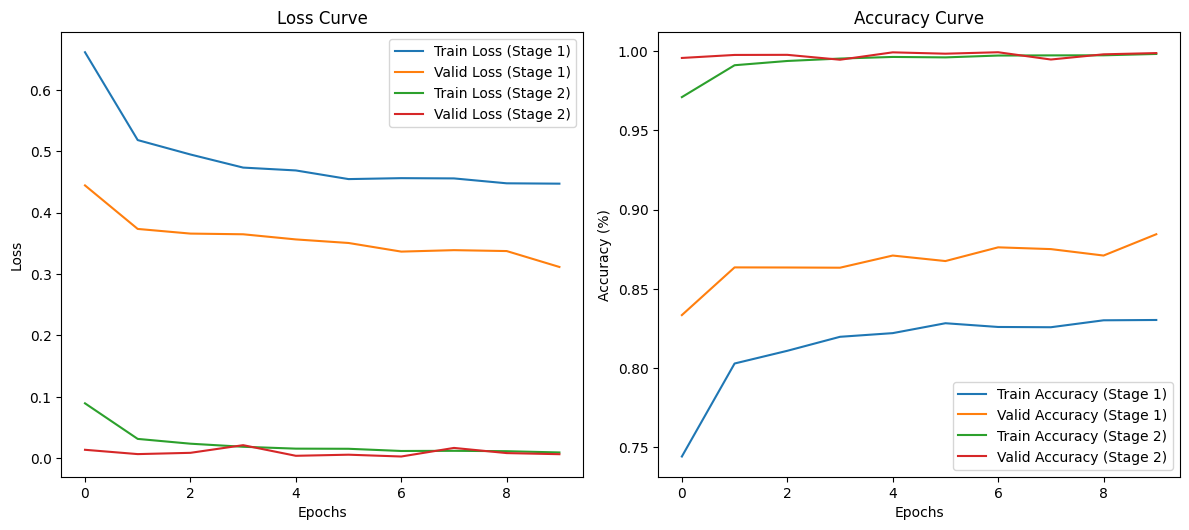

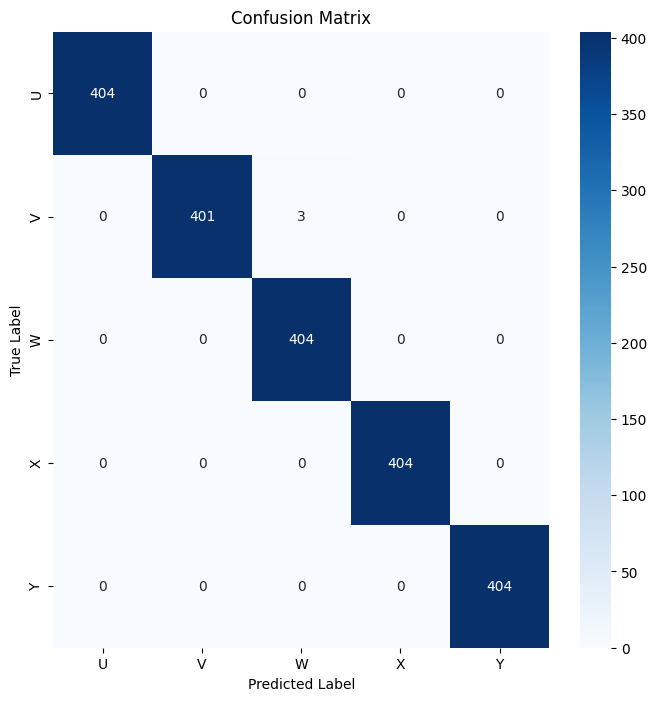

In [35]:


# Vẽ Loss và Accuracy cho cả 2 giai đoạn fine-tuning
plot_metrics(train_losses_stage1, valid_losses_stage1, train_accs_stage1, valid_accs_stage1,
             train_losses_stage2, valid_losses_stage2, train_accs_stage2, valid_accs_stage2)

# Vẽ Confusion Matrix
class_names = ['U', 'V', 'W', 'X', 'Y']
plot_confusion_matrix(model, test_loader, class_names)

## **Resnet50**

In [ ]:
# prompt: connect to drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, random_split
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
from torchsummary import summary
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix


In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# Kiểm tra thiết bị GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Transform cho ảnh đầu vào ResNet-50 train và test riêng biệt
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),   # Lật ngẫu nhiên ảnh
    transforms.ColorJitter(brightness=0.2, contrast=0.2),  # Thay đổi sáng tối
    transforms.RandomRotation(15),  # Xoay tối đa 15 độ
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

transform_test = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load dataset từ thư mục
train_folder = "/content/drive/MyDrive/Colab Notebooks/DeepLearning/Project/Dataset/train"
test_folder = "/content/drive/MyDrive/Colab Notebooks/DeepLearning/Project/Dataset/test"

# Tạo dataset
dataset_train = datasets.ImageFolder(root=train_folder, transform=transform_train)
dataset_test = datasets.ImageFolder(root=test_folder, transform=transform_test)

# Chia tập train thành 80% train, 20% validation
train_size = int(0.8 * len(dataset_train))
valid_size = len(dataset_train) - train_size
train_dataset, valid_dataset = random_split(dataset_train, [train_size, valid_size])

# Dataloader tối ưu cho GPU
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4, pin_memory=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)
test_loader = DataLoader(dataset_test, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)

# Kiểm tra số lượng ảnh trong từng tập
print(f"Train size: {len(train_dataset)}, Validation size: {len(valid_dataset)}, Test size: {len(dataset_test)}")


Using device: cuda
Train size: 60992, Validation size: 15248, Test size: 2020


Resnet50 from scratch

Kỹ thuật Batch norm - Drop out - Regularization

In [ ]:
class IdentityBlock(nn.Module):
    def __init__(self, in_channels, filters, dropout=0.3):
        super(IdentityBlock, self).__init__()
        F1, F2, F3 = filters

        self.conv1 = nn.Conv2d(in_channels, F1, kernel_size=1, stride=1, padding=0)
        self.bn1 = nn.BatchNorm2d(F1)

        self.conv2 = nn.Conv2d(F1, F2, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(F2)

        self.conv3 = nn.Conv2d(F2, F3, kernel_size=1, stride=1, padding=0)
        self.bn3 = nn.BatchNorm2d(F3)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=dropout)

    def forward(self, x):
        shortcut = x

        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.conv3(x)
        x = self.bn3(x)
        x += shortcut
        x = self.relu(x)

        return x

In [ ]:
class ConvolutionalBlock(nn.Module):
    def __init__(self, in_channels, filters, s=2, dropout=0.3):
        super(ConvolutionalBlock, self).__init__()
        F1, F2, F3 = filters

        self.conv1 = nn.Conv2d(in_channels, F1, kernel_size=1, stride=s, padding=0)
        self.bn1 = nn.BatchNorm2d(F1)

        self.conv2 = nn.Conv2d(F1, F2, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(F2)

        self.conv3 = nn.Conv2d(F2, F3, kernel_size=1, stride=1, padding=0)
        self.bn3 = nn.BatchNorm2d(F3)

        self.conv_shortcut = nn.Conv2d(in_channels, F3, kernel_size=1, stride=s, padding=0)
        self.bn_shortcut = nn.BatchNorm2d(F3)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=dropout)

    def forward(self, x):
        shortcut = self.conv_shortcut(x)
        shortcut = self.bn_shortcut(shortcut)

        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.conv3(x)
        x = self.bn3(x)
        x += shortcut
        x = self.relu(x)

        return x

In [ ]:
class ResNet50(nn.Module):
    def __init__(self, input_channels, num_classes=5):
        super(ResNet50, self).__init__()

        self.conv1 = nn.Conv2d(input_channels, 64, kernel_size=7, stride=2, padding=3)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.stage2 = nn.Sequential(
            ConvolutionalBlock(64, [64, 64, 256], s=1),
            IdentityBlock(256, [64, 64, 256]),
            IdentityBlock(256, [64, 64, 256])
        )

        self.stage3 = nn.Sequential(
            ConvolutionalBlock(256, [128, 128, 512], s=2),
            IdentityBlock(512, [128, 128, 512]),
            IdentityBlock(512, [128, 128, 512]),
            IdentityBlock(512, [128, 128, 512]),
        )

        self.stage4 = nn.Sequential(
            ConvolutionalBlock(512, [256, 256, 1024], s=2),
            *[IdentityBlock(1024, [256, 256, 1024]) for _ in range(5)]
        )

        self.stage5 = nn.Sequential(
            ConvolutionalBlock(1024, [512, 512, 2048], s=2),
            IdentityBlock(2048, [512, 512, 2048]),
            IdentityBlock(2048, [512, 512, 2048]),
        )

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.dropout = nn.Dropout(p=0.5)  # Dropout trước Fully Connected Layer
        self.fc = nn.Linear(2048, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.stage2(x)
        x = self.stage3(x)
        x = self.stage4(x)
        x = self.stage5(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.dropout(x)
        x = self.fc(x)

        return x

In [ ]:
from torchsummary import summary

# Load model ResNet50
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet50(input_channels=3, num_classes=len(dataset_train.classes))
model = model.to(device)

# Kiểm tra model summary
from torchsummary import summary
summary(model, (3, 224, 224))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,472
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5          [-1, 256, 56, 56]          16,640
       BatchNorm2d-6          [-1, 256, 56, 56]             512
            Conv2d-7           [-1, 64, 56, 56]           4,160
       BatchNorm2d-8           [-1, 64, 56, 56]             128
              ReLU-9           [-1, 64, 56, 56]               0
          Dropout-10           [-1, 64, 56, 56]               0
           Conv2d-11           [-1, 64, 56, 56]          36,928
      BatchNorm2d-12           [-1, 64, 56, 56]             128
             ReLU-13           [-1, 64, 56, 56]               0
          Dropout-14           [-1, 64,

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import numpy as np

# Train 1 epoch
def train_one_epoch(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    progress_bar = tqdm(train_loader, desc="Training", leave=False)

    for images, labels in progress_bar:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

        progress_bar.set_postfix(loss=f"{running_loss / (total // images.size(0)):.4f}", acc=f"{correct / total:.4f}")

    train_acc = correct / total
    return running_loss / len(train_loader), train_acc


# Validate 1 epoch
def validate_one_epoch(model, valid_loader, criterion, device):
    model.eval()
    val_loss, correct, total = 0.0, 0, 0

    progress_bar = tqdm(valid_loader, desc="Validating", leave=False)

    with torch.no_grad():
        for images, labels in progress_bar:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

            progress_bar.set_postfix(loss=f"{val_loss / (total // images.size(0)):.4f}", acc=f"{correct / total:.4f}")

    val_acc = correct / total
    return val_loss / len(valid_loader), val_acc

In [ ]:
import torch
import numpy as np

def train_loop(model, train_loader, valid_loader, criterion, optimizer, scheduler, epochs, patience, device):
    best_val_loss = np.inf
    patience_counter = 0

    # Lưu lại lịch sử training
    train_losses, valid_losses = [], []
    train_accs, valid_accs = [], []

    for epoch in range(epochs):
        # Train & Validate 1 epoch
        train_loss, train_acc = train_one_epoch(model, train_loader, criterion, optimizer, device)
        val_loss, val_acc = validate_one_epoch(model, valid_loader, criterion, device)

        # Lưu lại loss & accuracy
        train_losses.append(train_loss)
        valid_losses.append(val_loss)
        train_accs.append(train_acc)
        valid_accs.append(val_acc)

        #  In ra kết quả mỗi epoch
        print(f" Epoch [{epoch+1}/{epochs}] - "
              f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | "
              f"Valid Loss: {val_loss:.4f} | Valid Acc: {val_acc:.4f}")

        # Step scheduler nếu có
        if scheduler:
            scheduler.step(val_loss)

        # Lưu model tốt nhất
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
            torch.save(model.state_dict(), "/content/drive/MyDrive/Colab Notebooks/DeepLearning/Project/model_resnet50.pth")
        else:
            patience_counter += 1
            print(f"⚠️ Early Stopping Counter: {patience_counter}/{patience}")
            if patience_counter >= patience:
                print("⏹️ Early Stopping Triggered! Training Stopped.")
                break

    return train_losses, valid_losses, train_accs, valid_accs



In [ ]:
# Loss, Optimizer, Scheduler


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)  # 💡 Weight Decay
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

#  Chạy training loop với Early Stopping (patience=3)
train_losses, valid_losses, train_accs, valid_accs = train_loop(
    model, train_loader, valid_loader, criterion, optimizer, scheduler, epochs=10, patience=3, device=device
)

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:243: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


 Epoch [1/10] - Train Loss: 1.6448 | Train Acc: 0.2154 | Valid Loss: 1.6031 | Valid Acc: 0.2259


 Epoch [2/10] - Train Loss: 1.0706 | Train Acc: 0.5312 | Valid Loss: 0.4159 | Valid Acc: 0.8498


 Epoch [3/10] - Train Loss: 0.2743 | Train Acc: 0.9093 | Valid Loss: 0.1894 | Valid Acc: 0.9383


 Epoch [4/10] - Train Loss: 0.2024 | Train Acc: 0.9313 | Valid Loss: 0.1407 | Valid Acc: 0.9521


 Epoch [5/10] - Train Loss: 0.1625 | Train Acc: 0.9463 | Valid Loss: 0.1471 | Valid Acc: 0.9492
⚠️ Early Stopping Counter: 1/3


 Epoch [6/10] - Train Loss: 0.1450 | Train Acc: 0.9518 | Valid Loss: 0.0759 | Valid Acc: 0.9753


 Epoch [7/10] - Train Loss: 0.1265 | Train Acc: 0.9587 | Valid Loss: 0.0826 | Valid Acc: 0.9741
⚠️ Early Stopping Counter: 1/3


 Epoch [8/10] - Train Loss: 0.1150 | Train Acc: 0.9623 | Valid Loss: 0.0704 | Valid Acc: 0.9754


 Epoch [9/10] - Train Loss: 0.1082 | Train Acc: 0.9646 | Valid Loss: 0.0654 | Valid Acc: 0.9787


 Epoch [10/10] - Train Loss: 0.0996 | Train Acc: 0.9676 | Valid Loss: 0.0589 | Valid Acc: 0.9821


In [ ]:
def test_model(model, test_loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    print(f"Test Accuracy: {100 * correct / total:.2f}%")



In [ ]:
# Load lại mô hình để dự đoán
model.load_state_dict(torch.load("/content/drive/MyDrive/Colab Notebooks/DeepLearning/Project/model_resnet50.pth"))
test_model(model, test_loader)

Test Accuracy: 96.78%


Vẽ biểu đồ

In [ ]:
def plot_metrics(train_loss, valid_loss, train_acc, valid_acc):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label="Train Loss")
    plt.plot(valid_loss, label="Valid Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Loss Curve")

    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label="Train Accuracy")
    plt.plot(valid_acc, label="Valid Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy (%)")
    plt.legend()
    plt.title("Accuracy Curve")

    plt.show()


# Vẽ Confusion Matrix
def plot_confusion_matrix(model, test_loader, class_names):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    cm = confusion_matrix(all_labels, all_preds)

    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

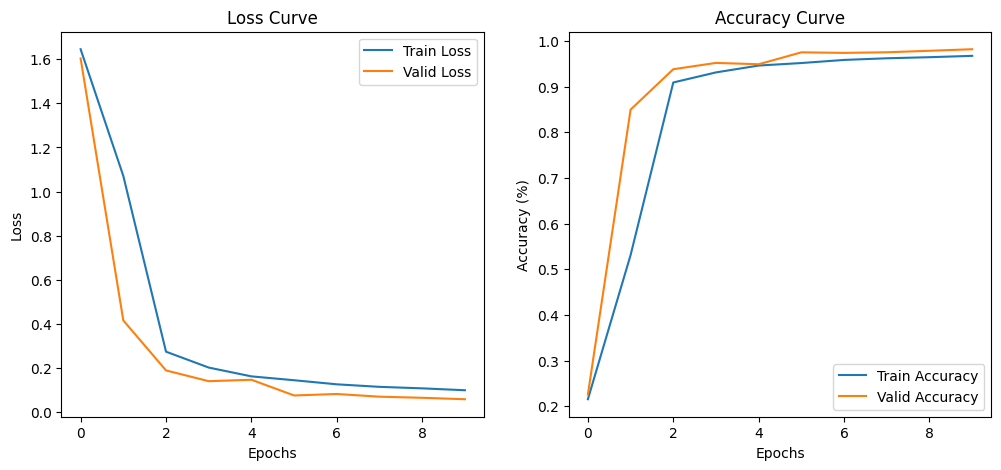

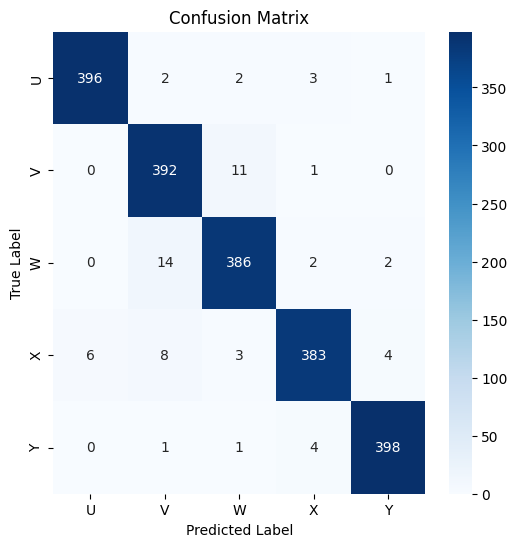

In [ ]:
# Vẽ biểu đồ Loss & Accuracy
plot_metrics(train_losses, valid_losses, train_accs, valid_accs)


# Vẽ Confusion Matrix
class_names = ['U', 'V', 'W', 'X', 'Y']
plot_confusion_matrix(model, test_loader, class_names)